In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
train_file = 'train.csv'
test_file = 'test.csv'
train = pd.read_csv(train_file, index_col=0, converters={'PassengerId': str})
test = pd.read_csv(test_file, index_col=0, converters={'PassengerId': str})

### Cuantitative Analysis


In [25]:
print('TRAIN INFO', train.info())
print()
print('TEST INFO', test.info())
train.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB
TRAIN INFO None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
Pclass      418 non-null int64
Name        418 non-null object
Sex         418 non-null object
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Ticket      418 non-null object
Fare        417 non-null float64
Cabin       91 non-null object
Embarked    418 non-null object
dtypes: float64(2), int64(3), object(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Comments:
    - Total 1309: 891 Train (68.1%), 418 Test (31.9%).
    - Missing values: Tr.Age (19.9%), Tr.Cabin (77.1%), Tr.Embarked (0.22%). Ts.Age (20.6%), Ts.Fare(0.24%), Ts.Cabin (78.2%).
        * See if Embarked is correlated with class, to impute missing values. See if Fare is correlated with class, to impute missing value.
        * Discard cabin as attribute. Lots of missing values.
        
Features:
    - Pclass can be related with the class: the lower the class, more money more influence to survive.
    - Name can be related. Maybe people got saved in groups of families. Surname can identify families or classes in families. Title identify their social state.
    - Sex can be related. Ladies may influence the ML algorithm.
    - Age can be related. Childs and elders are more fragile. 
    - SibSp/ParCh can be related, but not too much.
    - Ticket: don't see inmediate correlation to text-mine the ticket.
    - Fare can be related. More money more influence.
    - Cabin can be related, but since we don't have enought data I decide to discard the attribute.
    - Embarked can be related. People from different port can be assigned into different locations.
    
    - Age is a numerical attribute.
    - Fare is a numerical attribute.
    - SibSp is a numerical attribute.
    - Parch is a numerical attribute.
    
Distributions
    - Pclass_1 24.2 % (9.0 % - 0, 15.3 % - 1) , Pclass_2 = 20.7 % (10.9 % - 0, 9.8 % - 1), Pclass_3 = 55.1 % (41.8 % - 0, 13.4 % - 1)
    - More probable to survive if lower class.

    - Sex_male 64.8 % (52.5 % - 0,  12.2 % - 1), Sex_female 35.2 % (9.1 % - 0, 26.2 % - 1)
    - More probable to survive if female.

    - Embarked_S 72.3 % (47.9 % - 0,  24.4 % - 1), Embarked_C 18.9 % (8.4 % - 0, 10.4 % - 1), Embarked_Q 8.6 % (5.3 % - 0, 3.4 % - 1)
    - More probable to survive if embarked in S or Q. Q and S similar.

    - More children that survived in range 0-5 or adultis in their early 30s. Not survived in their late 20s. Behaivor strange from 0-15 ages.
    - Lower fare did not survive.
    - Zero SibSp survived (0, 1-3, 4+)
    - Parch 1-3 survived (0, 1, 2+)

### Decisions
    - Discard Ticket. DONE
    - Discard Cabin. DONE
        - Has cabin attribute?
    - Impute Tr embarked to S (more frequent) DONE
    - Impute Ts fare to the median. DONE
    - Impute Age somehow. DONE
    - Fare in logScale? DONE
    - Categorize SibSp and Parch. High neg correlations within SibSp and Parch. Use binary. DONE
    - Add a categorical feature called title. (second phase)
    - Add a categorical feature called surname. (second phase)

### Classifiers

##### Naive Classifiers
 - Random classifier = 50.0 % (two classes)
 - Most-frequent classifier = 61.6 % if classified "Not Survived"

##### Basic  ML Classifiers
 - Cassifier 1.1 (LogReg with Pclass, Fare, Sex and Embarked) = 78.89 % (71-87)
 - Cassifier 1.2 (DTC with Pclass, Fare, Sex and Embarked) = 82.22 % (73-89)
 - Cassifier 1.3 (RFC with Pclass, Fare, Sex and Embarked) = 82.22 % (74-89)

##### Adding the Age imputed as median achieves a minor improvement in LogReg and RFC
 - Cassifier 2.1 (LogReg with Pclass, Fare, Sex and Embarked. Imputing Age as median) = 78.89 % (71-87)
 - Cassifier 2.2 (DTC with Pclass, Fare, Sex and Embarked. Imputing Age as median) = 81.11 % (73-89).   *SUBMISSION 1*
 - Cassifier 2.3 (RFC with Pclass, Fare, Sex and Embarked. Imputing Age as median) = 83.33 % (76-89)

##### Imputing the Age using most frequent achieves a minor improvement in DTC
 - Cassifier 3.1 (LogReg with Pclass, Fare, Sex and Embarked. Imputing Age as most_freq) = 78.89 % (71-87)
 - Cassifier 3.2 (DTC with Pclass, Fare, Sex and Embarked. Imputing Age as most_freq) = 82.22 % (73-89)
 - Cassifier 3.3 (RFC with Pclass, Fare, Sex and Embarked. Imputing Age as most_freq) = 82.22 % (76-90)

##### Imputing the Age using KNN achieves a minor improvement in DTC
 - Cassifier 4.1 (LogReg with Pclass, Fare, Sex and Embarked. Imputing Age with KNN) = 78.89 % (71-88)
 - Cassifier 4.2 (DTC with Pclass, Fare, Sex and Embarked. Imputing Age with KNN) = 82.22 % (73-89)
 - Cassifier 4.3 (RFC with Pclass, Fare, Sex and Embarked. Imputing Age with KNN) = 82.22 % (76-90)

##### Adding Parch and SpSib achieves a 2 % of improvement in LogReg.
 - Cassifier 5.1 (LogReg with Pclass, Fare, Sex, Parch, SpSib and Embarked. Imputing Age as median) = 80.0 % (72-88)
 - Cassifier 5.2 (DTC with Pclass, Fare, Sex, Parch, SpSib and Embarked. Imputing Age as median) = 81.1 % (73-89)
 - Cassifier 5.3 (RFC with Pclass, Fare, Sex, Parch, SpSib and Embarked. Imputing Age as median) = 82.2 % (73-88)

##### Imputing the Age using most frequent and using logFare. Mostly equal results.
 - Cassifier 6.1 (LogReg with Pclass, logFare, Sex and Embarked. Imputing Age as most_freq) = 78.89 % (71-88)
 - Cassifier 6.2 (DTC with Pclass, logFare, Sex and Embarked. Imputing Age as most_freq) = 82.22 % (73-89)
 - Cassifier 6.3 (RFC with Pclass, logFare, Sex and Embarked. Imputing Age as most_freq) = 82.22 % (76-90)

##### Adding Parch and SpSib in bins.
 - Cassifier 7.1 (LogReg with Pclass, logFare, Sex, bParch, bSpSib and Embarked. Imputing Age as most_frequent) = 80.00 % (72-88)
 - Cassifier 7.2 (DTC with Pclass, logFare, Sex, bParch, bSpSib and Embarked. Imputing Age as most_frequent) = 82.22 % (73-89)
 - Cassifier 7.3 (RFC with Pclass, logFare, Sex, bParch, bSpSib and Embarked. Imputing Age as most_frequent) = 82.2 % (73-88)


In [26]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor

seed = 110
cv = 10

In [27]:
from sklearn.base import BaseEstimator, TransformerMixin

class DummyEncoder(BaseEstimator, TransformerMixin):
    ''' Encode the attributes using One-Hot Ecoder and deletes redundant attributes'''
    
    def __init__(self, handle_unknown='ignore', categories = 'auto', keep_first = False):
        self.handle_unknown = handle_unknown
        self.categories = categories
        self.keep_first = keep_first

    def transform(self, X):
        X_transf = np.array([])
        for x in range(X.shape[1]):
            coltransf = self.OHE[x].transform(X[:,[x]])
            coltransf = coltransf if self.keep_first else coltransf[:,1:]
            X_transf = coltransf if not len(X_transf) else np.append(X_transf, coltransf, axis=1)
        return X_transf

    def fit(self, X, y=None, **fit_params):
        self.OHE = list()
        for x in range(X.shape[1]):
            ohe = OneHotEncoder(sparse=False, categories = self.categories,
                                handle_unknown=self.handle_unknown).fit(X[:,[x]])
            self.OHE.append(ohe)
        return self
    
    
class KNNImputer(BaseEstimator, TransformerMixin):
    ''' Impute one attribute using KNN'''
    
    def __init__(self, col_num, scoring='neg_mean_squared_error'):
        assert col_num > -1
        self.scoring = scoring
        self.col_num = col_num

    def transform(self, X, nan_mask = None, col_num = -1,):
        self.col_num = self.col_num if col_num < 0 else col_num
        assert self.col_num < X.shape[1] and self.col_num > -1

        computed_mask = np.array(np.isnan(X[:,self.col_num]))
        nan_mask = computed_mask if type(nan_mask) == type(None) and sum(computed_mask) else np.array(nan_mask) if type(nan_mask) != type(None) else self.nan_mask
        assert len(nan_mask) == X.shape[0]
        Xdf = pd.DataFrame(X)
        ybase = Xdf.iloc[:,self.col_num]
        Xbase = Xdf.drop([self.col_num], axis=1, inplace=False)

        ypred = self.imputer.predict(Xbase[nan_mask])
        Xdf.loc[nan_mask,self.col_num]= ypred

        return Xdf.values

    def fit(self, X, y=None, col_num = -1, nan_mask = None, **fit_params):
        self.col_num = self.col_num if col_num < 0 else col_num
        assert self.col_num < X.shape[1] and self.col_num > -1
        
        computed_mask = np.array(np.isnan(X[:,self.col_num]))
        self.nan_mask = np.array(nan_mask) if not sum(computed_mask) else computed_mask
        assert len(self.nan_mask) == X.shape[0]
        
        Xdf = pd.DataFrame(X)
        ybase = Xdf.iloc[:,self.col_num]
        Xbase = Xdf.drop([self.col_num], axis=1, inplace=False)

        param_grid = [{'n_neighbors': [1,3,5,9,13,15,19,21,25,31,35,41], 'weights' : ['uniform', 'distance']}]
        knn = GridSearchCV(cv=cv,estimator=KNeighborsRegressor(), scoring=self.scoring, param_grid=param_grid, iid=False)
        knn.fit(Xbase.loc[~self.nan_mask,:], ybase[~self.nan_mask])

        self.score = knn.best_score_
        self.imputer = knn.best_estimator_
        return self


In [28]:
def confidencePrediction(X, y, est, cv=10, n_perm = 1000, seed=110, c=95):
    ''' Provides the train, test and overfitting confidence of the model using permutations.'''
    from numpy import random
    from sklearn.base import clone
    
    # Initialization
    random.seed(seed)
    trains = np.empty(n_perm)
    tests = np.empty(n_perm)
    clf = clone(est)
    y = np.array(y)
    X = np.array(X)

    # Compute the train and test score using permutations
    for n in range(n_perm):
        ind = random.permutation(len(y))
        X_train, X_test, y_train, y_test = train_test_split(X[ind,:], y[ind], test_size = 1/float(cv), random_state=seed)
        clf.fit(X_train, y_train)
        trains[n] = clf.score(X_train, y_train)
        tests[n] = clf.score(X_test, y_test)
        
    # Compute the confidence intervals
    edges = (100-c)/2
    interval = [edges, 50, 100-edges]
    train_conf = np.percentile(trains, interval)
    test_conf = np.percentile(tests, interval)
    ofit_conf = np.percentile(trains-tests, interval)
    
    return train_conf, test_conf, ofit_conf

### Here starts the magic

In [29]:
train['Title'] = train.Name.apply(lambda x: x.split(', ')[1].split('.')[0])
test['Title'] = test.Name.apply(lambda x: x.split(', ')[1].split('.')[0])
columns2drop = ['Name', 'Ticket', 'Cabin']
target = ['Survived']
y = train[target].values.ravel()

xtrain = train.drop(columns2drop+target, axis = 1)
xtest = test.drop(columns2drop, axis = 1)

In [30]:
TitlesHash = {
    'Capt' : 'Mr',
    'Col' : 'Other',
    'Don' : 'Mr',
    'Dona' : 'Mrs',
    'Dr' : 'Dr',
    'Jonkheer' : 'Mr',
    'Lady' : 'Other',
    'Major' : 'Other',
    'Master' : 'Master',
    'Miss' : 'Miss',
    'Mlle' : 'Miss',
    'Mme' : 'Mrs',
    'Mr' : 'Mr',
    'Mrs' : 'Mrs',
    'Ms' : 'Mrs',
    'Rev' : 'Mr',
    'Sir' : 'Other',
    'the Countess' : 'Other',
    'Other' : 'Other'
}

In [31]:
# Log space fare
xtrain.Fare = xtrain.Fare.apply(lambda x: np.log(x+1) if not np.isnan(x) else np.nan)
xtest.Fare = xtest.Fare.apply(lambda x: np.log(x+1) if not np.isnan(x) else np.nan)

# Bin SpSib 0 1 2-3 4+
xtrain.SibSp = xtrain.SibSp.apply(lambda x: 0 if x < 1 else 1)
xtest.SibSp = xtest.SibSp.apply(lambda x: 0 if x < 1 else 1)

# Bin Parch 0 1 2-3 4+
xtrain.Parch = xtrain.Parch.apply(lambda x: 0 if x < 1 else 1)
xtest.Parch = xtest.Parch.apply(lambda x: 0 if x < 1 else 1)

# Titles
xtrain.Title = xtrain.Title.apply(lambda x: TitlesHash[x])
xtest.Title = xtest.Title.apply(lambda x: TitlesHash[x])

#Embark
xtrain.Embarked = xtrain.Embarked.apply(lambda x: 'E' if x=='Q' or x=='S' else 'F')
xtest.Embarked = xtest.Embarked.apply(lambda x: 'E' if x=='Q' or x=='S' else 'F')


In [32]:
numeric_features = ['Fare', 'Age']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])


categorical_features = ['Pclass', 'Sex', 'Embarked','SibSp', 'Parch', 'Title']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', DummyEncoder(keep_first=False))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [33]:
# Preprocess the data
X_train = preprocessor.fit_transform(xtrain)
X_test = preprocessor.transform(xtest)

# Imputation of the Age using KNN
age_imputer = KNNImputer(col_num = 1, scoring='neg_mean_squared_error')
X_train = age_imputer.fit_transform(X_train, nan_mask=np.isnan(xtrain.Age))
X_test = age_imputer.transform(X_test, np.isnan(xtest.Age))
age_imputer.score
#-0.9533649711008643
#-0.7621561722461755

-0.7520629958508432

In [34]:
# Model selection

In [35]:
param_grid = [{'C': np.logspace(0.0001, 100, 10), 
               'penalty': ['l1', 'l2'],
               'random_state': [seed],
               'solver': ['liblinear']}]
logreg = GridSearchCV(cv=cv,estimator=LogisticRegression(), param_grid=param_grid, scoring='accuracy', return_train_score=True, iid=False)
logreg.fit(X_train, y)
trainscore = logreg.score(X_train, y)
valscore = logreg.best_score_

print('Best model')
print(logreg.best_estimator_)
print()

print('Train: %.2f %%, Valid: %.2f %%, Overfit: %.2f %%'%(trainscore*100, valscore*100, trainscore*100 - valscore*100))
train_conf, test_conf, ofit_conf = confidencePrediction(X_train, y, est=logreg.best_estimator_, n_perm=1000)
print('Expected Train: %.2f %% • %.2f %% • %.2f %%'%(train_conf[0]*100, train_conf[1]*100, train_conf[2]*100))
print('Expected Test: %.2f %% • %.2f %% • %.2f %%'%(test_conf[0]*100, test_conf[1]*100, test_conf[2]*100))
print('Expected Overfit: %.2f %% • %.2f %% • %.2f %%'%(ofit_conf[0]*100, ofit_conf[1]*100, ofit_conf[2]*100)) 

Best model
LogisticRegression(C=129181403900.30573, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l1', random_state=110,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

Train: 83.39 %, Valid: 82.05 %, Overfit: 1.34 %
Expected Train: 82.15 % • 83.15 % • 84.14 %
Expected Test: 74.44 % • 82.22 % • 88.89 %
Expected Overfit: -6.50 % • 0.92 % • 9.58 %


In [36]:
param_grid = [{'criterion': ['entropy', 'gini'], 
               'max_depth': np.arange(1, 12),
               'min_samples_split': [2,5,10],
               'min_samples_leaf': np.arange(1, 8),
               'random_state': [seed]}]
dtree = GridSearchCV(cv=cv,estimator=DecisionTreeClassifier(), param_grid=param_grid, scoring='accuracy', return_train_score=True, iid=False)
dtree.fit(X_train, y)
trainscore = dtree.score(X_train, y)
valscore = dtree.best_score_

print('Best model')
print(dtree.best_estimator_)
print()

print('Train: %.2f %%, Valid: %.2f %%, Overfit: %.2f %%'%(trainscore*100, valscore*100, trainscore*100 - valscore*100))
train_conf, test_conf, ofit_conf = confidencePrediction(X_train, y, est=dtree.best_estimator_, n_perm=1000)
print('Expected Train: %.2f %% • %.2f %% • %.2f %%'%(train_conf[0]*100, train_conf[1]*100, train_conf[2]*100))
print('Expected Test: %.2f %% • %.2f %% • %.2f %%'%(test_conf[0]*100, test_conf[1]*100, test_conf[2]*100))
print('Expected Overfit: %.2f %% • %.2f %% • %.2f %% '%(ofit_conf[0]*100, ofit_conf[1]*100, ofit_conf[2]*100)) 

Best model
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=7, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=110,
            splitter='best')

Train: 85.86 %, Valid: 83.84 %, Overfit: 2.01 %
Expected Train: 85.64 % • 86.64 % • 87.64 %
Expected Test: 74.44 % • 82.22 % • 90.00 %
Expected Overfit: -3.73 % • 4.17 % • 12.70 % 


In [37]:
param_grid = [{'n_estimators': [800, 1000, 1200],
               'criterion': ['gini'], 
               'max_features': ['sqrt'], 
               'max_depth': np.arange(1, 15),
               'min_samples_split': np.arange(2, 15),
               'min_samples_leaf': np.arange(1, 3),
               'random_state': [seed]}]
rf = RandomizedSearchCV(cv=cv, n_iter=50, estimator=RandomForestClassifier(), param_distributions = param_grid[0], scoring='accuracy', return_train_score=True, random_state=seed, iid=False)
rf.fit(X_train, y)
trainscore = rf.score(X_train, y)
valscore = rf.best_score_

print('Best model')
print(rf.best_estimator_)
print()

print('Train: %.2f %%, Valid: %.2f %%, Overfit: %.2f %%'%(trainscore*100, valscore*100, trainscore*100 - valscore*100))
train_conf, test_conf, ofit_conf = confidencePrediction(X_train, y, est=rf.best_estimator_, n_perm=500)
print('Expected Train: %.2f %% • %.2f %% • %.2f %%'%(train_conf[0]*100, train_conf[1]*100, train_conf[2]*100))
print('Expected Test: %.2f %% • %.2f %% • %.2f %%'%(test_conf[0]*100, test_conf[1]*100, test_conf[2]*100))
print('Expected Overfit: %.2f %% • %.2f %% • %.2f %%'%(ofit_conf[0]*100, ofit_conf[1]*100, ofit_conf[2]*100)) 




Best model
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=14, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=12,
            min_weight_fraction_leaf=0.0, n_estimators=800, n_jobs=None,
            oob_score=False, random_state=110, verbose=0, warm_start=False)

Train: 88.66 %, Valid: 84.19 %, Overfit: 4.48 %
Expected Train: 88.14 % • 88.89 % • 89.76 %
Expected Test: 76.67 % • 84.44 % • 90.00 %
Expected Overfit: -1.92 % • 4.82 % • 12.41 %


In [38]:
from xgboost import XGBClassifier
                   
param_grid = [{'n_estimators': [300, 400, 500, 600, 700, 800, 900, 1000],
               'max_depth': np.arange(1, 15),
               'booster' : ['gbtree'],
               'reg_lambda' : np.logspace(0.0001, 10, 15),
               'reg_alpha' : np.logspace(0.0001, 10, 15),
               'learning_rate' : np.logspace(0.0001, 10, 15),
               'min_child_weight': np.arange(1, 15),
               'max_delta_step': np.arange(0, 3),
               'base_score' : [.681],
               'random_state': [seed]}]

xgb = RandomizedSearchCV(cv=cv, n_iter=1000, estimator=XGBClassifier(), param_distributions = param_grid[0], scoring='accuracy', return_train_score=True, random_state=seed, iid=False)
xgb.fit(X_train, y)
trainscore = xgb.score(X_train, y)
valscore = xgb.best_score_

print('Best model')
print(xgb.best_estimator_)
print()
print('Train: %.2f %%, Valid: %.2f %%, Overfit: %.2f %%'%(trainscore*100, valscore*100, trainscore*100 - valscore*100))
train_conf, test_conf, ofit_conf = confidencePrediction(X_train, y, est=xgb.best_estimator_, n_perm=500)
print('Expected Train: %.2f %% • %.2f %% • %.2f %%'%(train_conf[0]*100, train_conf[1]*100, train_conf[2]*100))
print('Expected Test: %.2f %% • %.2f %% • %.2f %%'%(test_conf[0]*100, test_conf[1]*100, test_conf[2]*100))
print('Expected Overfit: %.2f %% • %.2f %% • %.2f %%'%(ofit_conf[0]*100, ofit_conf[1]*100, ofit_conf[2]*100)) 

Best model
XGBClassifier(base_score=0.681, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=1.0002302850208247,
       max_delta_step=2, max_depth=10, min_child_weight=10, missing=None,
       n_estimators=900, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=110,
       reg_alpha=1.0002302850208247, reg_lambda=26.83225316276363,
       scale_pos_weight=1, seed=None, silent=True, subsample=1)

Train: 89.67 %, Valid: 84.07 %, Overfit: 5.61 %
Expected Train: 88.82 % • 89.64 % • 90.64 %
Expected Test: 76.67 % • 84.44 % • 91.11 %
Expected Overfit: -1.97 % • 5.26 % • 13.41 %


/Users/bergner/anaconda3/lib/python3.6/site-packages/pandas/core/indexes/api.py:107: RuntimeWarning: '<' not supported between instances of 'str' and 'int', sort order is undefined for incomparable objects
  result = result.union(other)


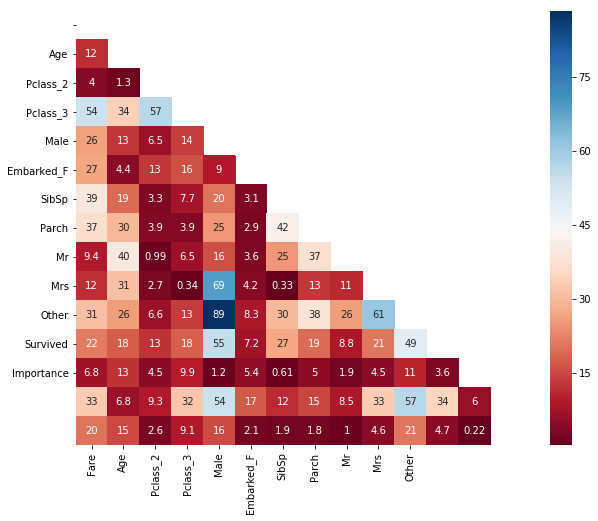

In [40]:
importance = rf.best_estimator_.feature_importances_*100
plt.figure(figsize=(10,8))
sns.color_palette("hls")
M = np.tril(pd.concat([pd.concat([pd.DataFrame(X_train), pd.DataFrame(y, columns=['Survived'])], axis = 1).corr()*100, pd.DataFrame(importance, columns=['importance'])], axis = 1).T, k=-1) 
M[M == 0] = np.nan
sns.heatmap(abs(M), annot=True, cmap="RdBu")
tags = ['Fare', 'Age', 'Pclass_2', 'Pclass_3', 'Male', 'Embarked_F',
            'SibSp', 'Parch', 'Mr', 'Mrs', 'Other', 'Survived', 'Importance']
plt.xticks(np.arange(len(tags)-2)+.5, tags[:-2], rotation=90)
plt.yticks(np.arange(len(tags))+.5, ['']+tags[1:], rotation=0)
plt.show()

### Predict for new samples

In [21]:
best = logreg.best_estimator_
y_predict = best.predict(X_test)
solution = pd.DataFrame(y_predict, index=xtest.index, columns=target)
solution.to_csv('TitanicSolution7.1.2.csv')